In [2]:
!python -c "import flwr_datasets;print(flwr_datasets.__version__)"

0.5.0


# Training Data

In [2]:
import numpy as np
from pprint import pprint

from flwr_datasets import FederatedDataset
from flwr_datasets.partitioner import IidPartitioner


dataset = "ashraq/movielens_ratings" 

# Partition the training set into 5 partitions
partitioner = IidPartitioner(num_partitions=5)           
fds = FederatedDataset(dataset=dataset,
                       partitioners={"train": partitioner})


# Load the partitions of the "train" split
partition_0 = fds.load_partition(0, "train")
partition_1 = fds.load_partition(1, "train")
partition_2 = fds.load_partition(2, "train")
partition_3 = fds.load_partition(3, "train")
partition_4 = fds.load_partition(4, "train")


# Descriptive statistics
print('Size of partitions')
print(len(partition_0))
print(len(partition_1))
print(len(partition_2))
print(len(partition_3))
print(len(partition_4))
print("-"*50)


print('Number of users')
print(len(np.unique(partition_0["user_id"])))
print(len(np.unique(partition_1["user_id"])))
print(len(np.unique(partition_2["user_id"])))
print(len(np.unique(partition_3["user_id"])))
print(len(np.unique(partition_4["user_id"])))
print("-"*50)


print('Numbr of movies')
print(len(np.unique(partition_0["movie_id"])))
print(len(np.unique(partition_1["movie_id"])))
print(len(np.unique(partition_2["movie_id"])))
print(len(np.unique(partition_3["movie_id"])))
print(len(np.unique(partition_4["movie_id"])))


/home/haya/miniconda/envs/fedrec/lib/python3.9/site-packages/flwr_datasets/utils.py:109: UserWarning: The currently tested dataset are ['mnist', 'ylecun/mnist', 'cifar10', 'uoft-cs/cifar10', 'fashion_mnist', 'zalando-datasets/fashion_mnist', 'sasha/dog-food', 'zh-plus/tiny-imagenet', 'scikit-learn/adult-census-income', 'cifar100', 'uoft-cs/cifar100', 'svhn', 'ufldl-stanford/svhn', 'sentiment140', 'stanfordnlp/sentiment140', 'speech_commands', 'LIUM/tedlium', 'flwrlabs/femnist', 'flwrlabs/ucf101', 'flwrlabs/ambient-acoustic-context', 'jlh/uci-mushrooms', 'Mike0307/MNIST-M', 'flwrlabs/usps', 'scikit-learn/iris', 'flwrlabs/pacs', 'flwrlabs/cinic10', 'flwrlabs/caltech101', 'flwrlabs/office-home', 'flwrlabs/fed-isic2019']. Given: ashraq/movielens_ratings.
  warnings.warn(


Size of partitions
178277
178277
178276
178276
178276
--------------------------------------------------
Number of users
31384
31297
31403
31404
31219
--------------------------------------------------
Numbr of movies
9307
9308
9280
9316
9329


/home/haya/miniconda/envs/fedrec/lib/python3.9/site-packages/flwr_datasets/metrics/utils.py:130: UserWarning: The verbose names can not be established. The column specified by 'column_name' needs to be of type 'ClassLabel' to create a verbose names. The available names will used.
  warnings.warn(


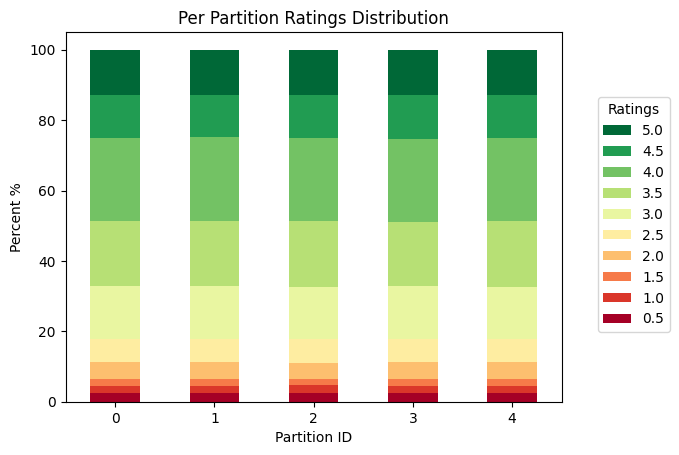

In [12]:
# Rating distribution
from flwr_datasets.visualization import plot_label_distributions

fig, ax, df = plot_label_distributions(
    partitioner,
    label_name="rating",
    plot_type="bar",
    size_unit="percent",
    partition_id_axis="x",
    legend=True,
    verbose_labels=True,
    title="Per Partition Ratings Distribution",
    legend_kwargs={"title": "Ratings"} 
)


#Stacked Bar Chart of Ratings (Normalized) to percent
#Each partition shows a nearly identical stacked bar distribution.
#The proportions of each rating category remain consistent across partitions.


# Statistical Tests 

In [26]:
import scipy.stats as stats


# Load the partitions of the "train" split
partition_0 = fds.load_partition(0, "train").to_pandas()
partition_1 = fds.load_partition(1, "train").to_pandas()
partition_2 = fds.load_partition(2, "train").to_pandas()
partition_3 = fds.load_partition(3, "train").to_pandas()
partition_4 = fds.load_partition(4, "train").to_pandas()

test_df = test.to_pandas()  # Convert dataset to pandas DataFrame



for i in range(5):
    print(f"\n========== Processing train_{i} ==========")
    
    # Retrieve the current training DataFrame.
    train_df = globals()[f"partition_{i}"]  
    
    # Get rating distributions
    train_counts = train_df['rating'].value_counts().sort_index()
    test_counts = test_df['rating'].value_counts().sort_index()

    # Normalize counts to get probability distributions
    train_probs = train_counts / train_counts.sum()
    test_probs = test_counts / test_counts.sum()

    def kl_divergence(train_probs, test_probs):
        return stats.entropy(test_probs, train_probs)

    def jensen_shannon_divergence(train_probs, test_probs):
        m = 0.5 * (train_probs + test_probs)
        kl_train_m = stats.entropy(train_probs, m)
        kl_test_m = stats.entropy(test_probs, m)
        return 0.5 * (kl_train_m + kl_test_m)

    # Run tests
    kl_div = kl_divergence(train_probs, test_probs)
    jsd = jensen_shannon_divergence(train_probs, test_probs)

    # Display results
    print(f"KL Divergence: {kl_div:.4f}")
    print(f"Jensen-Shannon Divergence: {jsd:.4f}")

    # **Interpretation:**
    # - If p-value > 0.05 → Train and test distributions are NOT significantly different (good for IID).
    # - KL and JSD near 0 → Train and test distributions are very similar.



========== Processing train_0 ==========
KL Divergence: 0.0000
Jensen-Shannon Divergence: 0.0000

========== Processing train_1 ==========
KL Divergence: 0.0001
Jensen-Shannon Divergence: 0.0000

========== Processing train_2 ==========
KL Divergence: 0.0001
Jensen-Shannon Divergence: 0.0000

========== Processing train_3 ==========
KL Divergence: 0.0001
Jensen-Shannon Divergence: 0.0000

========== Processing train_4 ==========
KL Divergence: 0.0001
Jensen-Shannon Divergence: 0.0000


In [2]:
import scipy.stats as stats

# Load the partitions of the "train" split
partition_0 = fds.load_partition(0, "train").to_pandas()
partition_1 = fds.load_partition(1, "train").to_pandas()
partition_2 = fds.load_partition(2, "train").to_pandas()
partition_3 = fds.load_partition(3, "train").to_pandas()
partition_4 = fds.load_partition(4, "train").to_pandas()

# Combine partitions into a list for easier iteration
partitions = [partition_0, partition_1, partition_2, partition_3, partition_4]

def kl_divergence(p, q):
    """
    Compute the KL divergence of q from p.
    Note: KL divergence is not symmetric.
    """
    return stats.entropy(q, p)

def jensen_shannon_divergence(p, q):
    """
    Compute the Jensen-Shannon divergence, a symmetric measure
    of the similarity between two probability distributions.
    """
    m = 0.5 * (p + q)
    kl_p_m = stats.entropy(p, m)
    kl_q_m = stats.entropy(q, m)
    return 0.5 * (kl_p_m + kl_q_m)

# Loop over each unique pair of partitions to compare their rating distributions
for i in range(len(partitions)):
    for j in range(i+1, len(partitions)):
        print(f"\n========== Comparing Partition {i} vs Partition {j} ==========")
        
        # Calculate the rating counts and probability distributions for partition i and partition j
        counts_i = partitions[i]['rating'].value_counts().sort_index()
        counts_j = partitions[j]['rating'].value_counts().sort_index()

        # Normalize counts to obtain probability distributions
        p_i = counts_i / counts_i.sum()
        p_j = counts_j / counts_j.sum()

        # Compute divergence metrics
        kl_div = kl_divergence(p_i, p_j)
        js_div = jensen_shannon_divergence(p_i, p_j)

        # Display results
        print(f"KL Divergence: {kl_div:.4f}")
        print(f"Jensen-Shannon Divergence: {js_div:.4f}")

        # Interpretation:
        # - KL Divergence near 0 indicates that partition j's distribution is very similar to partition i's.
        # - Jensen-Shannon Divergence near 0 also indicates high similarity between the two distributions.



========== Comparing Partition 0 vs Partition 1 ==========
KL Divergence: 0.0000
Jensen-Shannon Divergence: 0.0000

========== Comparing Partition 0 vs Partition 2 ==========
KL Divergence: 0.0001
Jensen-Shannon Divergence: 0.0000

========== Comparing Partition 0 vs Partition 3 ==========
KL Divergence: 0.0000
Jensen-Shannon Divergence: 0.0000

========== Comparing Partition 0 vs Partition 4 ==========
KL Divergence: 0.0001
Jensen-Shannon Divergence: 0.0000

========== Comparing Partition 1 vs Partition 2 ==========
KL Divergence: 0.0001
Jensen-Shannon Divergence: 0.0000

========== Comparing Partition 1 vs Partition 3 ==========
KL Divergence: 0.0000
Jensen-Shannon Divergence: 0.0000

========== Comparing Partition 1 vs Partition 4 ==========
KL Divergence: 0.0001
Jensen-Shannon Divergence: 0.0000

========== Comparing Partition 2 vs Partition 3 ==========
KL Divergence: 0.0001
Jensen-Shannon Divergence: 0.0000

========== Comparing Partition 2 vs Partition 4 ==========
KL Divergenc

# Held Out Test Data

size test
99043
Number of users
25450
Number of movies
7264


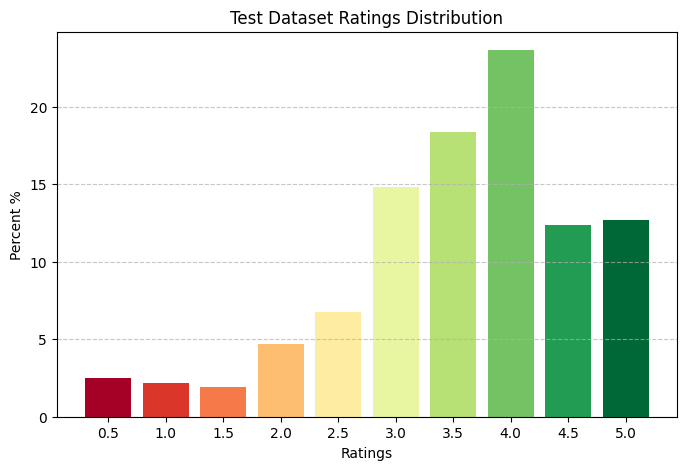

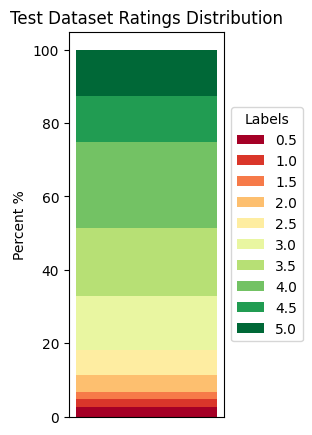

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

test = fds.load_split("validation")

# Descrptive statitics
print('size test')
print(len(test))
print('Number of users')
print(len(np.unique(test["user_id"])))
print('Number of movies')
print(len(np.unique(test["movie_id"])))



def plot_rating_distribution(dataset):
    """
    Generate a bar plot showing the percentage distribution of ratings 
    with colors mapped using the RdYlGn colormap.
    
    Parameters:
        dataset (pandas.DataFrame): The dataset containing the 'rating' column.
    """
    rating_counts = dataset['rating'].value_counts().sort_index()
    rating_percentages = (rating_counts / rating_counts.sum()) * 100
    colors = plt.cm.RdYlGn(np.linspace(0, 1, len(rating_percentages)))
    plt.figure(figsize=(8, 5))
    plt.bar(rating_percentages.index, rating_percentages.values, width=0.4, color=colors)
    
    plt.xlabel('Ratings')
    plt.ylabel('Percent %')
    plt.title('Test Dataset Ratings Distribution')
    plt.xticks(rating_percentages.index)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()


test_df = test.to_pandas()  # Convert dataset to pandas DataFrame
plot_rating_distribution(test_df)



# Convert counts to percentages
rating_counts = test_df['rating'].value_counts().sort_index()
rating_percentages = (rating_counts / rating_counts.sum()) * 100
fig, ax = plt.subplots(figsize=(2, 5))
colors = plt.cm.RdYlGn(np.linspace(0, 1, len(rating_percentages)))

bottom = 0
for (rating, percentage), color in zip(rating_percentages.items(), colors):
    ax.bar(1, percentage, bottom=bottom, color=color, label=f"{rating}")
    bottom += percentage

ax.set_ylabel("Percent %")
ax.set_xticks([])
ax.set_title("Test Dataset Ratings Distribution")

ax.legend(title="Labels", loc="center left", bbox_to_anchor=(1, 0.5))
plt.show()

